In [107]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 95s 1us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


[6] [3]


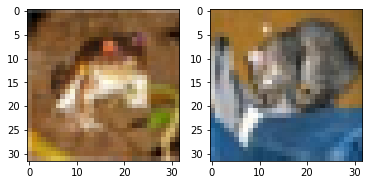

In [16]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[0])
ax[1].imshow(X_test[0])
print(y_train[0],y_test[0])
plt.show()  # Show the plot


In [30]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Creating classes variable as per the dataset description provided at https://www.cs.toronto.edu/%7Ekriz/cifar.html

In [31]:
classes=["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [33]:
def plot(x,y,index):
    plt.figure(figsize =(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

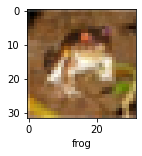

In [34]:
plot(X_train,y_train,0)

In [35]:
X_train = X_train/255
X_test = X_test/255

In [52]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation ='relu'),
    layers.Dense(10,activation = 'sigmoid')
])

ann.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
           metrics =['accuracy'])
ann.fit(X_train,y_train,epochs=5)

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 70ms/step - accuracy: 0.2740 - loss: 2.2246
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.3912 - loss: 1.6912
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.4282 - loss: 1.5927
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4499 - loss: 1.5377
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4622 - loss: 1.4941


In [53]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4608 - loss: 1.5126


[1.51923668384552, 0.462799996137619]

In [54]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.48      0.52      1000
           1       0.57      0.59      0.58      1000
           2       0.36      0.09      0.15      1000
           3       0.36      0.21      0.27      1000
           4       0.35      0.49      0.41      1000
           5       0.37      0.41      0.39      1000
           6       0.49      0.53      0.51      1000
           7       0.46      0.60      0.52      1000
           8       0.51      0.70      0.59      1000
           9       0.52      0.52      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.45     10000
weighted avg       0.46      0.46      0.45     10000



In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [139]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax')
])


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [143]:
cnn.compile(optimizer= 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics =['accuracy'])

In [130]:
cnn.fit(X_train,y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3023 - loss: 1.8705
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5292 - loss: 1.3154
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5956 - loss: 1.1456
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6330 - loss: 1.0471
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6626 - loss: 0.9589
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6917 - loss: 0.8893
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7109 - loss: 0.8312
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7197 - loss: 0.7971
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7338 - loss: 0.7620
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7473 - loss: 0.7239


In [131]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.87      0.82      0.84      1000
           2       0.60      0.58      0.59      1000
           3       0.51      0.60      0.55      1000
           4       0.72      0.61      0.66      1000
           5       0.69      0.55      0.61      1000
           6       0.64      0.88      0.74      1000
           7       0.84      0.68      0.75      1000
           8       0.77      0.87      0.82      1000
           9       0.80      0.83      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [132]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7155 - loss: 0.8517


[0.8579054474830627, 0.7129999995231628]

Shape of the preprocessed image: (1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[3.50898020e-02 1.38988878e-06 9.32831049e-01 1.13516105e-02
  1.45794535e-02 2.80343607e-04 4.46317438e-03 1.68516017e-05
  1.37653027e-03 9.83184418e-06]]
Predicted class: bird


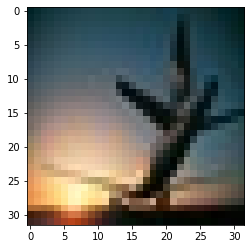

In [135]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Preprocess the image
def preprocess_image(image_path, target_size=(32, 32)):
    # Load the image with the target size
    image = load_img(image_path, target_size=target_size)
    plt.imshow(image)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Normalize the image (if required by your model)
    image = image / 255.0  # Example normalization
    # Expand dimensions to include batch size
    image = np.expand_dims(image, axis=0)
    
    return image

# Example usage
image_path = "/path/"

# Preprocess the image
my_image = preprocess_image(image_path, target_size=(32, 32))

# Verify the shape of the preprocessed image
print(f"Shape of the preprocessed image: {my_image.shape}")

# Predict using the model
predictions = cnn.predict(my_image)
print(predictions)

# Optionally, decode the predictions if necessary
# For example, if using a softmax layer for classification
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {classes[predicted_class[0]]}")
